### Compare LSTM vs. Prophet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
lstm_results = pd.read_csv('/content/drive/MyDrive/lstm_results.csv', index_col=0)
prophet_results = pd.read_csv('/content/drive/MyDrive/prophet_results.csv', index_col=0)

In [ ]:
def process_results(df, suffix):
  df1 = df.copy()
  df1['hour'] = df1['fn'].apply(lambda x: x.split('.')[0].split('_')[-1][:-1])
  df1['comm_area'] = df1['fn'].apply(lambda x: x.split('_')[-2].split('beat')[-1])
  df1['norm_rmse'] = df1['rmse']/df1['y_test_m']
  df1['norm_mae'] = df1['mae']/df1['y_test_m']
  df1.columns = [xx+suffix if xx != 'fn' else xx for xx in df1.columns ]
  return df1

In [ ]:
lstm_results1 = process_results(lstm_results, '_LSTM')
prophet_results1 = process_results(prophet_results, '_Prophet')
df = lstm_results1.merge(prophet_results1,on='fn')

In [ ]:
assert df['hour_LSTM'].equals(df['hour_Prophet'])
assert df['comm_area_LSTM'].equals(df['comm_area_Prophet'])
assert np.all(np.isclose(df['y_test_m_LSTM'], df['y_test_m_Prophet'], atol=1e-2))
df = df.rename(columns={'hour_LSTM':'hour', 'comm_area_LSTM':'comm_area'}).drop(['comm_area_Prophet', 'hour_Prophet'], axis=1)
df.groupby('hour').mean()[['norm_rmse_LSTM', 'norm_rmse_Prophet' , 'norm_mae_LSTM', 'norm_mae_Prophet']]

,norm_rmse_LSTM,norm_rmse_Prophet,norm_mae_LSTM,norm_mae_Prophet
hour,,,,
2,1.600753,1.634770,1.171963,1.183084
4,1.172088,1.216080,0.915143,0.927936
6,0.990481,1.027853,0.786577,0.801074
8,0.871330,0.916870,0.691245,0.718537


In [ ]:
df8 = df[df['hour']=='8'].copy()

cols2comp = ['norm_rmse_LSTM', 'norm_rmse_Prophet']
rmse_dict = pd.Series([0,0,], index=[xx.split('_')[-1] for xx in cols2comp]).to_dict()
rmse_comp = df8[cols2comp].idxmin(axis=1).value_counts()
rmse_comp.index = [xx.split('_')[-1] for xx in rmse_comp.index]
rmse_dict.update( (k,v) for k,v in rmse_comp.to_dict().items() )

cols2comp = ['norm_mae_LSTM', 'norm_mae_Prophet']
mae_dict = pd.Series([0,0,], index=[xx.split('_')[-1] for xx in cols2comp]).to_dict()
mae_comp = df8[cols2comp].idxmin(axis=1).value_counts()
mae_comp.index = [xx.split('_')[-1] for xx in mae_comp.index]
mae_dict.update( (k,v) for k,v in mae_comp.to_dict().items() )

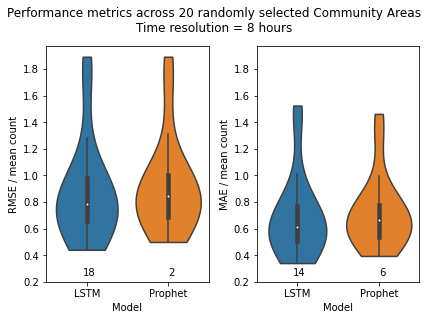

In [ ]:
df8_melt = df8[['norm_rmse_LSTM', 'norm_rmse_Prophet', 'norm_mae_LSTM', 'norm_mae_Prophet']].melt()
df8_melt['Model'] = df8_melt['variable'].apply(lambda x: x.split('_')[-1])
df8_melt['Metric'] = df8_melt['variable'].apply(lambda x: x.split('_')[1].upper())
df8_melt

fig, axs = plt.subplots(1,2, figsize=(6,4), sharey=True)
sns.violinplot(x='Model', y='value', data=df8_melt[df8_melt['Metric']=='RMSE'], cut=0, ax=axs[0])
axs[0].set(ylabel='RMSE / mean count', xlabel='Model')
sns.violinplot(x='Model', y='value', data=df8_melt[df8_melt['Metric']=='MAE'], cut=0, ax=axs[1])
axs[1].set(ylabel='MAE / mean count', xlabel='Model')

for ax in axs: 
  ax.set_ylim([0.2, None])
  ax.yaxis.set_tick_params(labelbottom=True)

axs[0].text(0-0.05, 0.25, rmse_dict['LSTM'])
axs[0].text(1, 0.25, rmse_dict['Prophet'])

axs[1].text(0-0.05, 0.25, mae_dict['LSTM'])
axs[1].text(1, 0.25, mae_dict['Prophet'])

fig.suptitle('Performance metrics across 20 randomly selected Community Areas\nTime resolution = 8 hours', y=1.1)
fig.tight_layout()
plt.show()

In [ ]:
df8 = df[df['hour']=='8'].copy()

cols2comp = ['rmse_LSTM', 'rmse_Prophet']
rmse_dict = pd.Series([0,0,], index=[xx.split('_')[-1] for xx in cols2comp]).to_dict()
rmse_comp = df8[cols2comp].idxmin(axis=1).value_counts()
rmse_comp.index = [xx.split('_')[-1] for xx in rmse_comp.index]
rmse_dict.update( (k,v) for k,v in rmse_comp.to_dict().items() )

cols2comp = ['mae_LSTM', 'mae_Prophet']
mae_dict = pd.Series([0,0,], index=[xx.split('_')[-1] for xx in cols2comp]).to_dict()
mae_comp = df8[cols2comp].idxmin(axis=1).value_counts()
mae_comp.index = [xx.split('_')[-1] for xx in mae_comp.index]
mae_dict.update( (k,v) for k,v in mae_comp.to_dict().items() )

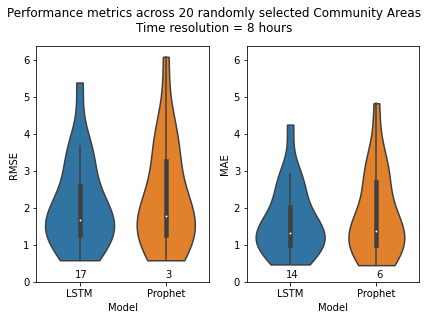

In [ ]:
df8_melt = df8[['rmse_LSTM', 'rmse_Prophet', 'mae_LSTM', 'mae_Prophet']].melt()
df8_melt['Model'] = df8_melt['variable'].apply(lambda x: x.split('_')[-1])
df8_melt['Metric'] = df8_melt['variable'].apply(lambda x: x.split('_')[0].upper())
df8_melt

fig, axs = plt.subplots(1,2, figsize=(6,4), sharey=True)
sns.violinplot(x='Model', y='value', data=df8_melt[df8_melt['Metric']=='RMSE'], cut=0, ax=axs[0])
axs[0].set(ylabel='RMSE', xlabel='Model')
sns.violinplot(x='Model', y='value', data=df8_melt[df8_melt['Metric']=='MAE'], cut=0, ax=axs[1])
axs[1].set(ylabel='MAE', xlabel='Model')

for ax in axs: 
  ax.set_ylim([0, None])
  ax.yaxis.set_tick_params(labelbottom=True)

axs[0].text(0-0.05, 0.1, rmse_dict['LSTM'])
axs[0].text(1, 0.1, rmse_dict['Prophet'])

axs[1].text(0-0.05, 0.1, mae_dict['LSTM'])
axs[1].text(1, 0.1, mae_dict['Prophet'])

fig.suptitle('Performance metrics across 20 randomly selected Community Areas\nTime resolution = 8 hours', y=1.1)
fig.tight_layout()
plt.show()

In [ ]:
df8[['fn', 'norm_rmse_LSTM', 'norm_rmse_Prophet', 'norm_mae_LSTM', 'norm_mae_Prophet']]

,fn,norm_rmse_LSTM,norm_rmse_Prophet,norm_mae_LSTM,norm_mae_Prophet
60,crimes_agg_ext_beat1_8h.csv,0.658702,0.719743,0.509671,0.564678
61,crimes_agg_ext_beat2_8h.csv,0.660019,0.718665,0.518506,0.568973
62,crimes_agg_ext_beat4_8h.csv,0.872422,0.893498,0.686501,0.712650
63,crimes_agg_ext_beat7_8h.csv,0.773622,1.021689,0.610360,0.856631
64,crimes_agg_ext_beat14_8h.csv,0.830885,0.851538,0.658060,0.670401
65,crimes_agg_ext_beat17_8h.csv,0.976776,0.994973,0.778196,0.771160
66,crimes_agg_ext_beat20_8h.csv,1.023249,1.043889,0.834621,0.800063
67,crimes_agg_ext_beat23_8h.csv,0.556149,0.649626,0.431664,0.513200
68,crimes_agg_ext_beat24_8h.csv,0.638177,0.653374,0.496961,0.522401
69,crimes_agg_ext_beat25_8h.csv,0.464369,0.524314,0.366262,0.416004
